In [354]:
import pandas as pd
from matplotlib import pylab as plt
import call_analysis_functions as caf

In [355]:
caf.xml_to_csv('../Call Data Analysis/calls.xml','../Call Data Analysis/calls3.csv')

In [356]:
df=pd.read_csv('calls3.csv')
call_data=df

In [357]:
call_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Phone_no      3000 non-null   int64 
 1   Duration      3000 non-null   int64 
 2   Date_spec     3000 non-null   int64 
 3   Type          3000 non-null   int64 
 4   Date&Time     3000 non-null   object
 5   Contact_Name  3000 non-null   object
dtypes: int64(4), object(2)
memory usage: 140.8+ KB


Now for the sake of privacy, we try to randomise phone numbers to anonymise the data.

In [358]:
randomArr=caf.generateRandomNumber(call_data['Phone_no'].nunique())
realArr=[i for i in call_data['Phone_no'].unique()]

In [359]:
replacement_values = caf.createDict(realArr, randomArr)

call_data['Phone_no'] = call_data['Phone_no'].replace(replacement_values)

In [360]:
call_data

,Phone_no,Duration,Date_spec,Type,Date&Time,Contact_Name
0,918257232255,38,1678361847319,2,09/03/2023 17:07:27,Mom
1,917278453288,65,1678365468124,1,09/03/2023 18:07:48,Sashank Desu
2,917278453288,0,1678374305347,2,09/03/2023 20:35:05,Sashank Desu
3,918576050916,109,1678374325731,2,09/03/2023 20:35:25,Karthik Alladi
4,918257232255,7,1678374395159,1,09/03/2023 20:36:35,Mom
...,...,...,...,...,...,...
2995,917538567497,0,1696312795248,2,03/10/2023 11:29:55,Hemsai
2996,917538567497,16,1696313453849,1,03/10/2023 11:40:53,Hemsai
2997,917278453288,62,1696316492954,1,03/10/2023 12:31:32,Sashank Desu
2998,917648318426,30,1696326019843,3,03/10/2023 15:10:19,Tvs


Converting the date column to a readable format and creating 'Date' and 'Time' columns

In [361]:
call_data[['Date', 'Time']] = call_data['Date&Time'].str.split(' ', expand=True)

call_data['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
call_data['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S')
call_data=call_data.drop(['Date&Time'],axis =1)
call_data=call_data.drop(['Date_spec'],axis =1)

Number of days for which the data is available

In [362]:
days=call_data['Date'].max()-call_data['Date'].min()
print(days.days,'days')

208 days


Range of months for which the data is available

In [363]:
minMonth=call_data['Date'].dt.month_name().min()
maxMonth=call_data['Date'].dt.month_name().max()
print(f'{minMonth} to {maxMonth}')

April to September


In [364]:
call_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Phone_no      3000 non-null   object        
 1   Duration      3000 non-null   int64         
 2   Type          3000 non-null   int64         
 3   Contact_Name  3000 non-null   object        
 4   Date          3000 non-null   datetime64[ns]
 5   Time          3000 non-null   datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(2)
memory usage: 140.8+ KB


Replacing Type integers with their respective strings

In [365]:
typeOfCalls = {
    1: 'Incoming',
    2: 'Outgoing',
    3: 'Missed',
    4: 'Voicemail',
    5: 'Rejected',
    6: 'Refused List'
}


In [366]:
call_data['Type']=call_data['Type'].replace(typeOfCalls)

In [367]:
call_data['Type'].value_counts()

Type
Incoming    1568
Outgoing    1079
Missed       353
Name: count, dtype: int64

Now since there miight be unknown numbers, we can try to find out what percentage of calls are unknown. And take a decision on whether to include them or not.

In [368]:
unknownDuration = call_data[call_data['Contact_Name']=='(Unknown)']['Duration'].sum()
total_duration=call_data['Duration'].sum()

In [369]:
percentageDuration = (unknownDuration/total_duration)*100
print(f"{percentageDuration:.2f}%")

1.47%


Finding out the count of '(Unknown)' calls and percentage of calls that are unknown.

In [370]:
unknownCount=call_data[call_data['Contact_Name']=='(Unknown)'].shape[0]
totalCount=call_data['Contact_Name'].shape[0]

In [371]:
percentageCount = (unknownCount/totalCount)*100
print(f"{percentageCount:.2f}%")

5.67%


Since the count and duration of calls are negligible, we can drop them.

In [372]:
call_data = call_data[call_data['Contact_Name'] != '(Unknown)']
call_data.shape

(2830, 6)

Converting Contact Names to a suitable format

In [373]:
call_data['Contact_Name'] = call_data['Contact_Name'].apply(caf.transform_name)

In [374]:
call_data_numeric = call_data[['Duration']].describe() 
print("Statistical Measure of Call Data in Numeric Data")
call_data_numeric

Statistical Measure of Call Data in Numeric Data


,Duration
count,2830.000000
mean,108.119788
std,316.286928
min,0.000000
25%,10.000000
50%,27.000000
75%,63.000000
max,5167.000000


### Charts and Graphs

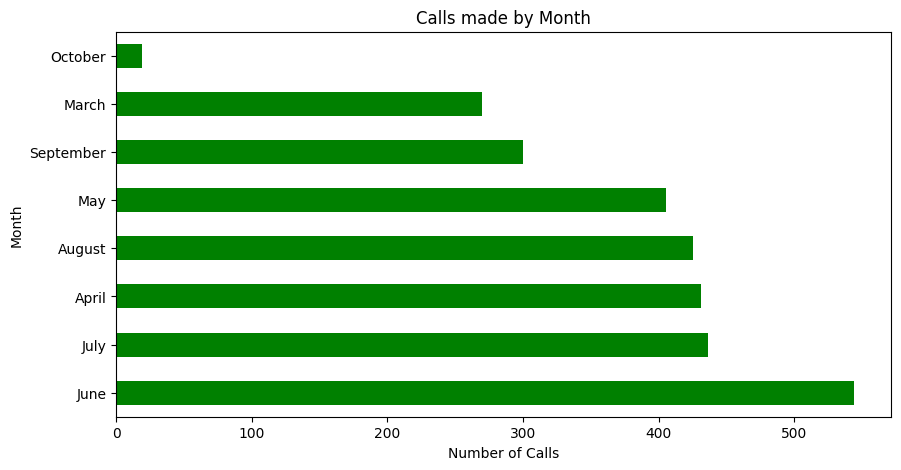

In [375]:
call_data['Month'] = call_data['Date'].dt.month_name()
call_data['Month'].value_counts().plot(kind='barh', figsize=(10,5), color='green')
plt.title('Calls made by Month')
plt.xlabel('Number of Calls')
plt.ylabel('Month')
plt.show()

June month has the highest number of calls: **544 calls**

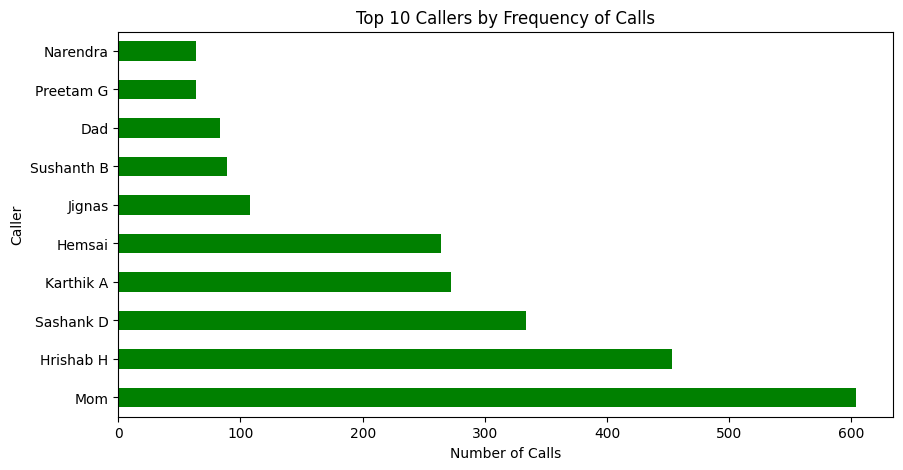

In [376]:
call_data['Contact_Name'].value_counts().head(10).plot(kind='barh', figsize=(10,5), color='green')
plt.title('Top 10 Callers by Frequency of Calls')
plt.xlabel('Number of Calls')
plt.ylabel('Caller')
plt.show()

Mom (understandably) is the highest caller: **604 calls** <br>
Thanks Mom!

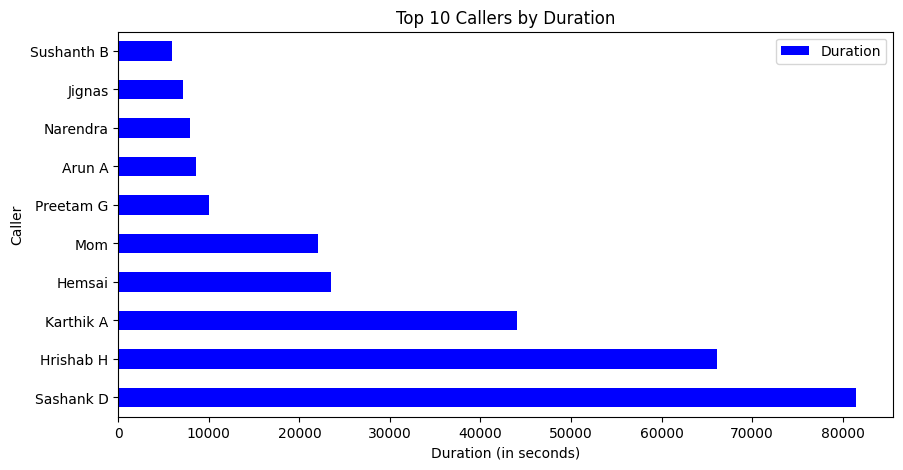

In [377]:
top10_callers = call_data.groupby('Contact_Name')['Duration'].sum().sort_values(ascending=False).head(10).to_frame()
top10_callers.plot(kind='barh', figsize=(10,5), color='blue')
plt.title('Top 10 Callers by Duration')
plt.xlabel('Duration (in seconds)')
plt.ylabel('Caller')
plt.show()

Sashank D is the most I've wasted my time on: **81513 seconds**

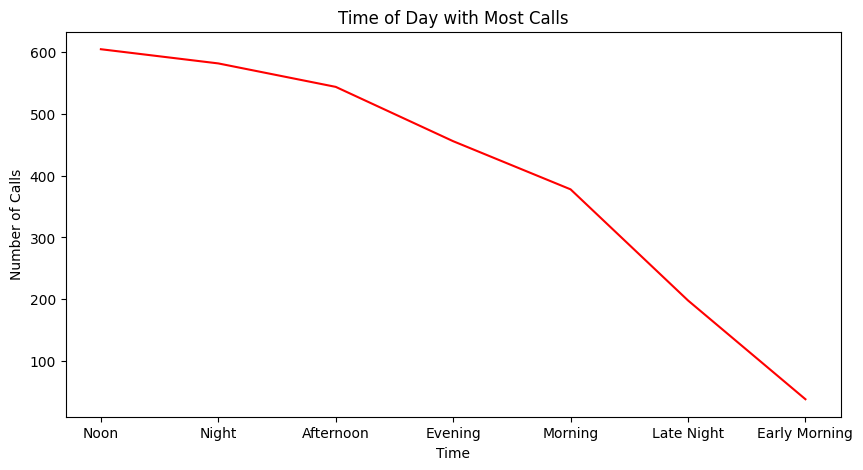

In [378]:
call_data['Time'] = pd.cut(call_data['Time'].dt.hour, 
                    bins=[0,3,6,9,12,15,18,21,24], 
                    labels=['Late Night','Early Morning','Morning','Noon',
                            'Afternoon','Evening','Night','Late Night'],
                    ordered=False)
call_data['Time'].value_counts().plot(kind='line', figsize=(10,5), color='red')

plt.title('Time of Day with Most Calls')
plt.xlabel('Time')
plt.ylabel('Number of Calls')
plt.show()

I've spent most of my Noon talking: **605 calls**

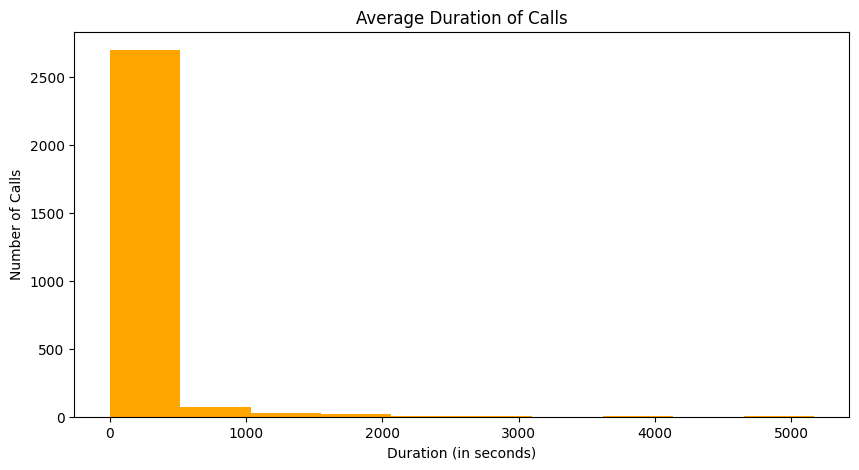

In [379]:
call_data['Duration'].plot(kind='hist', figsize=(10,5), color='orange')
plt.title('Average Duration of Calls')
plt.xlabel('Duration (in seconds)')
plt.ylabel('Number of Calls')
plt.show()

My average talktime is **108 seconds** :)

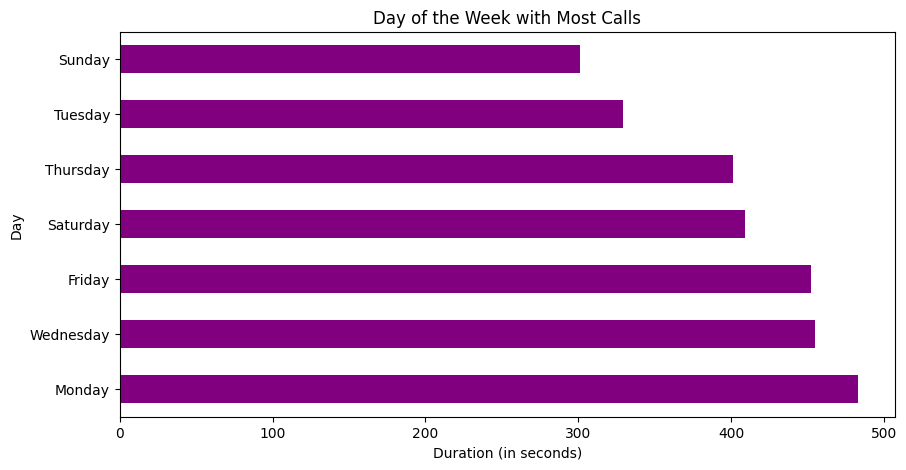

In [380]:
call_data['Date'].dt.day_name().value_counts().plot(kind='barh', figsize=(10,5), color='purple')
plt.title('Day of the Week with Most Calls')
plt.xlabel('Duration (in seconds)')
plt.ylabel('Day')
plt.show()

Monday (understandably, since I have to beg my friends to attend college) is the day I talk the most: **483 calls**

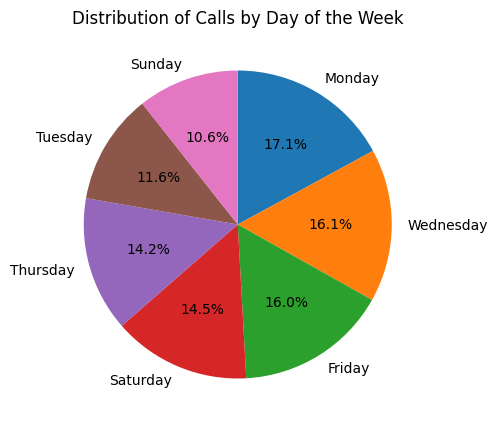

In [381]:
call_data['Date'].dt.day_name().value_counts().plot(kind='pie', figsize=(10,5), autopct='%1.1f%%', startangle=90, counterclock=False)
plt.title('Distribution of Calls by Day of the Week')
plt.ylabel('')
plt.show()

I don't think this needs much explaination

Anyway, that's it folks. Hope you enjoyed my call analysis. <br>
See you next time!